In [21]:
from PIL import Image
import numpy as np
import os

In [22]:
test_dir = 'flower-data/test/'

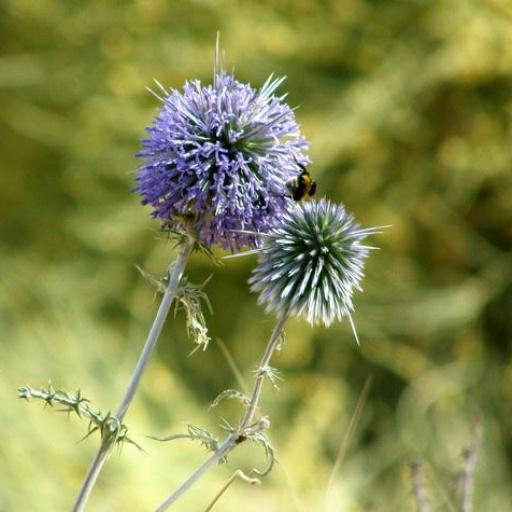

In [23]:
test_images = []

for image in os.listdir(test_dir):
    test_images.append(test_dir+image)

Image.open(test_images[2])

In [24]:
from tensorflow.keras.models import load_model
import tensorflow as tf

In [25]:


for i in (test_images):
    im = tf.keras.preprocessing.image.img_to_array(Image.open(i))
    im = tf.image.resize(im,size=(256,256))
    im = tf.expand_dims(im,0)
    

In [6]:
im[0].shape

TensorShape([256, 256, 3])

In [26]:
valid_dir = 'flower-data/val/'

valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)
valid_gen = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='categorical'
)

Found 12157 images belonging to 104 classes.


In [27]:
class_names = list(valid_gen.class_indices.keys())
class_names

['alpine sea holly',
 'anthurium',
 'artichoke',
 'azalea',
 'balloon flower',
 'barberton daisy',
 'bee balm',
 'bird of paradise',
 'bishop of llandaff',
 'black-eyed susan',
 'blackberry lily',
 'blanket flower',
 'bolero deep blue',
 'bougainvillea',
 'bromelia',
 'buttercup',
 'californian poppy',
 'camellia',
 'canna lily',
 'canterbury bells',
 'cape flower',
 'carnation',
 'cautleya spicata',
 'clematis',
 'colt foot',
 'columbine',
 'common dandelion',
 'common tulip',
 'corn poppy',
 'cosmos',
 'cyclamen',
 'daffodil',
 'daisy',
 'desert-rose',
 'fire lily',
 'foxglove',
 'frangipani',
 'fritillary',
 'garden phlox',
 'gaura',
 'gazania',
 'geranium',
 'giant white arum lily',
 'globe thistle',
 'globe-flower',
 'grape hyacinth',
 'great masterwort',
 'hard-leaved pocket orchid',
 'hibiscus',
 'hippeastrum',
 'iris',
 'japanese anemone',
 'king protea',
 'lenten rose',
 'lilac hibiscus',
 'lotus',
 'love in the mist',
 'magnolia',
 'mallow',
 'marigold',
 'mexican petunia',
 

In [28]:
from matplotlib import pyplot as plt

In [57]:
model = load_model('model10epochs.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 64)       0

In [58]:
model.load_weights('model10epochs.h5')

In [32]:
for image_batch, label_batch in valid_gen:
    first_image = image_batch[0]
    first_label = int(label_batch[0])

    print('first img to predict')
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(prediction[0])])
    break

TypeError: only length-1 arrays can be converted to Python scalars

flower-data/test/0039e54f0.jpeg


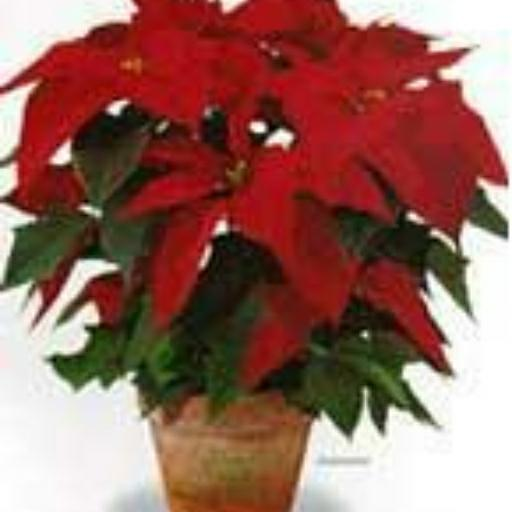

In [65]:
index = 3
im = tf.keras.preprocessing.image.img_to_array(Image.open(test_images[index]))
im = tf.image.resize(im,size=(256,256))
im = tf.expand_dims(im,0)
print(test_images[index])
Image.open(test_images[index])

In [66]:
pred = model.predict(im)
pred_class = class_names[np.argmax(pred)]
conf = round(100*(np.argmax(pred)),2)
print("predicted label:",class_names[np.argmax(pred)])

1/1 [==============================] - 0s 36ms/step
predicted label: common tulip
